# Homework 3
- Execute the below code, then answer the numbered questions.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, RobustScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

df = pd.read_csv('car-reg-data (1).csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9055 entries, 0 to 9054
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   make           8164 non-null   object 
 1   transmission   8106 non-null   object 
 2   state          8152 non-null   object 
 3   condition      8173 non-null   float64
 4   odometer       8178 non-null   float64
 5   auction_value  8107 non-null   float64
 6   selling_price  9055 non-null   float64
dtypes: float64(4), object(3)
memory usage: 495.3+ KB


In [2]:
df.head()

,make,transmission,state,condition,odometer,auction_value,selling_price
0,nissan,automatic,md,4.8,NaN,14350.0,13600.0
1,ford,automatic,mo,3.7,29398.0,17600.0,17100.0
2,ford,automatic,fl,3.2,32180.0,19100.0,17600.0
3,nissan,automatic,ca,NaN,30798.0,11950.0,10700.0
4,ford,automatic,nj,2.8,29526.0,28000.0,26100.0


In [3]:
from sklearn.model_selection import train_test_split
features = [x for x in df.columns if x != 'selling_price']

X = df[features]
y = df['selling_price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

print(f'Records in training data: {X_train.shape[0]:,}')
print(f'Records in test data: {X_test.shape[0]:,}')
print('\nFeatures:')
print(*X_train.columns, sep='\n')

Records in training data: 7,244
Records in test data: 1,811

Features:
make
transmission
state
condition
odometer
auction_value


In [4]:
X.head()

,make,transmission,state,condition,odometer,auction_value
0,nissan,automatic,md,4.8,NaN,14350.0
1,ford,automatic,mo,3.7,29398.0,17600.0
2,ford,automatic,fl,3.2,32180.0,19100.0
3,nissan,automatic,ca,NaN,30798.0,11950.0
4,ford,automatic,nj,2.8,29526.0,28000.0


In [5]:
#Missing Values
X.isna().sum()

make             891
transmission     949
state            903
condition        882
odometer         877
auction_value    948
dtype: int64

## Question 1: Split the features into two lists, one for the numerical features and another for the categorical features.

In [6]:

#Split Numerical Features
Numerical = [col for col in X.columns if X[col].dtypes!='O']
Numerical

['condition', 'odometer', 'auction_value']

In [7]:
# Split Categorical_Features 
Categorical = [col for col in X.columns if (X[col].dtypes=='O')]
Categorical

['make', 'transmission', 'state']

In [8]:
#num_cols = [col for col in X_train.columns if X_train[col].dtypes!='O']
#cat_cols = [col for col in X_train.columns if (X_train[col].dtypes=='O')]


## Question 2: Using the numerical variables, create a pipeline that replaces the missing values with the median and then standardizes the values using a standard scaler.

In [9]:
#pipeline that replaces the missing values with the median and then standardizes the values using a standard scaler for Numerical variables
pp_num = Pipeline([
    ('num_imp', SimpleImputer(strategy='median', add_indicator=False)),
    ('rob_num',StandardScaler())
])

## Question 3: Using the categorical variables, create a pipeline that replaces the missing values with the most frequent and then use one-hot encoding to convert the data to numerical arrays.
- You should be dropping one category from each variable when using the one-hot encoder.  
- To ensure the pipeline doesn't break when it receives new/unexpected categories, you should ignore new categories.
- Use a fit transformer on the training dataset to validate all the columns are now numeric and to determine how many columns the transformed data contains.

In [10]:
#pipeline that replaces the missing values with the median and then standardizes the values using a standard scaler for categorical variables
pp_cat = Pipeline([
    ('cat_imp', SimpleImputer(strategy='most_frequent', add_indicator=False, fill_value='missing')),
    ('ohe_cat', OneHotEncoder(sparse=False, handle_unknown='error',drop='first'))
])

## Question 4: Combine the numerical and categorical pipelines into one data processing pipeline.
- Use a fit transformers and the training dataset to verify the data has no missing values and the correct number of columns.

In [11]:
#Combine the numerical and categorical pipelines into one data processing pipeline.
from sklearn.impute import MissingIndicator
ct = ColumnTransformer([
    ('mi', MissingIndicator(), X.columns),
    ('pp_num', pp_num, Numerical),
    ('pp_cat', pp_cat, Categorical)
])

In [12]:
#Use a fit transformers and the training dataset to verify the data has no missing values and the correct number of columns.
xtrain= ct.fit_transform(X_train).astype(np.float)
pd.DataFrame(xtrain).head()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,0.0,0.0,0.0,0.0,1.0,0.0,0.812041,-0.187630,-0.268271,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.684329,-0.479351,0.743492,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,-1.231354,0.861689,-0.740427,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,-0.209657,-0.553430,-0.389683,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,-0.592793,-0.003804,-0.544820,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
#No Missing Values 
pd.DataFrame(xtrain).isna().sum().sum()

0

In [14]:
X_test.head()

,make,transmission,state,condition,odometer,auction_value
2393,ford,automatic,ga,4.5,25212.0,NaN
3010,ford,automatic,wa,3.3,84684.0,18750.0
4283,nissan,automatic,NaN,3.5,45604.0,15700.0
7445,bmw,NaN,ca,4.6,11577.0,50300.0
6307,honda,automatic,il,NaN,35903.0,10800.0


In [15]:
xtest=ct.transform(X_test).astype(np.float)
xtest

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

## Question 5: Add a linear regression model to the pipeline.
- Report what the $R^2$ is using the `test` data.  

$R^2$ : Coffeciant of Determination : $R^2$ = 1-$[Rss/Rtotal]$
Rss : Sum of Squares of Residuals
Rtital : Total Sum of Squares 
$R^2$ : Coffeciant of Determination : 0<$R^2$<1

In [16]:
pipe_final = Pipeline([
    ('ct_step', ct),
    ('model', LinearRegression())
])


In [17]:
pipe_final.fit(X_train, y_train)
y_pred=pipe_final.predict(X_test)
pipe_final.score(X_test, y_test)
print('R2 Score with Linear Regression:',r2_score(y_test,y_pred))

R2 Score with Linear Regression: 0.8878696333091843


## Question 6: Create a plot(s) of the residuals. Do you have any concerns about patterns in the residuals that the model is neglecting to pick-up?
- Include a sentence or two on what you observe.

In [18]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
#!pip install yellowbrick
from yellowbrick.regressor import ResidualsPlot

In [19]:
#!pip install scikit-learn==0.18.2 

A good way to visualize the variance of the data is to use a residual plot.

What is a residual?

The difference between the observed value (y) and the predicted value (Yhat) is called the residual (e). When we look at a regression plot, the residual is the distance from the data point to the fitted regression line.

So what is a residual plot?

A residual plot is a graph that shows the residuals on the vertical y-axis and the independent variable on the horizontal x-axis.

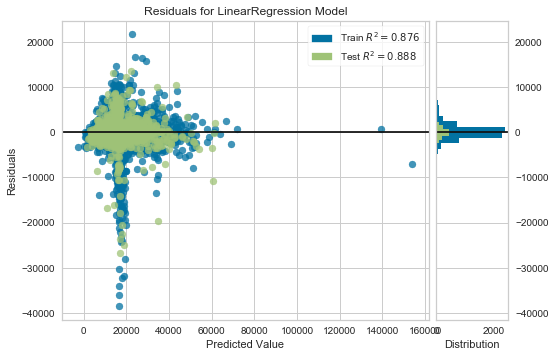

In [20]:
model = LinearRegression()
visualizer = ResidualsPlot(model)

visualizer.fit(xtrain, y_train)  # Fit the training data to the visualizer
visualizer.score(xtest, y_test)  # Evaluate the model on the test data
visualizer.show()

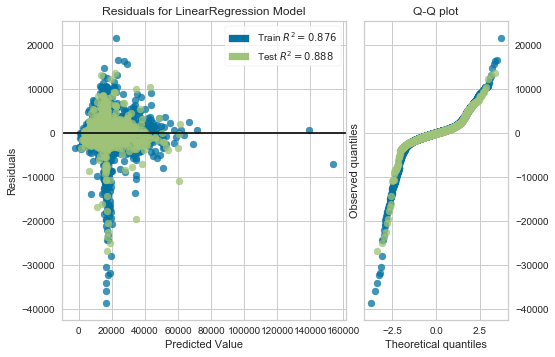

In [21]:
visualizer = ResidualsPlot(model, hist=False, qqplot=True)
visualizer.fit(xtrain, y_train)  # Fit the training data to the visualizer
visualizer.score(xtest, y_test)  # Evaluate the model on the test data
visualizer.show()

Insert description here:

Residuals are semi normally distributed (if normally distributed then we get complete stright line in QQ Plot)

By looking Histogram, we can observe that the data too Peak in middle 

Categorical Variables Creating Sparce matrix so, Model performnace is effected by this features


## Question 7: Modify the pipeline to use a ridge regression model with an alpha value of 100. How does this change the $R^2$?

In [22]:
from sklearn.linear_model import Ridge

model=Ridge(alpha=100)

pipe_final_Ridge = Pipeline([
    ('ct_step', ct),
    ('model', model)
])
pipe_final_Ridge.fit(X_train, y_train)
y_pred=pipe_final_Ridge.predict(X_test)
pipe_final_Ridge.score(X_test, y_test)
print('R2 Score using Ridge Regression:',r2_score(y_test,y_pred))

R2 Score using Ridge Regression: 0.8869407752919761


Inference: Using Ridge Regression  $R^2$ Value Slightly increased 